This notebook analyses the ICA benchmark results for the taxonomy feeders.

In [1]:
import pandas

In [2]:
data = pandas.read_csv("ica_test.csv",index_col=0,usecols=[1,2,3,4,5,6])

In [3]:
data

,node_count,link_count,der_count,baseline_time[s],icatest_time[s]
file,,,,,
R1-12470-1.glm,660,1832,20,3.419,9.410
R1-12470-2.glm,366,852,13,1.071,1.491
R1-12470-3.glm,96,75,21,0.806,0.963
R1-12470-4.glm,331,392,12,1.001,1.431
R1-25000-1.glm,506,463,90,0.953,10.736
R2-12470-1.glm,654,751,82,1.183,18.122
R2-12470-2.glm,274,644,8,1.234,1.653
R2-12470-3.glm,855,1812,11,1.265,1.797
R2-25000-1.glm,474,800,72,1.813,32.745


In [4]:
import matplotlib.pyplot as plt
import scipy.optimize as opt
import numpy as np

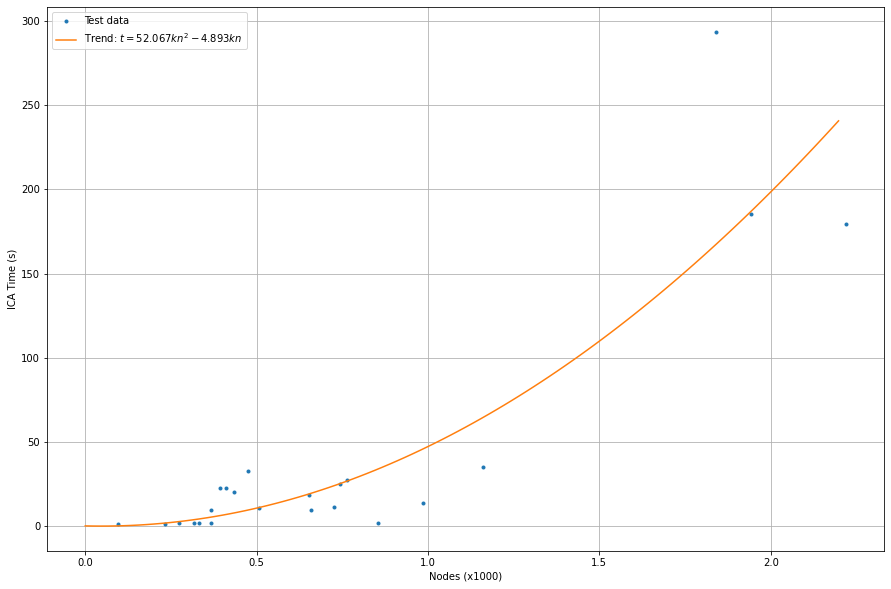

In [5]:
x = data['node_count']/1000
y = data['icatest_time[s]']
def quadratic_zero(x,a,b): return (a*x+b)*x
fit,cov = opt.curve_fit(quadratic_zero,x,y)
xx = np.arange(0,max(x),max(x)/100)

plt.figure(figsize=(15,10))
plt.plot(x,y,'.',label="Test data")
plt.plot(xx,quadratic_zero(xx,*fit),label=f"Trend: $t = {fit[0]:.3f}kn^2{fit[1]:+.3f} kn$")
plt.grid()
plt.xlabel("Nodes (x1000)")
plt.ylabel("ICA Time (s)")
plt.legend();

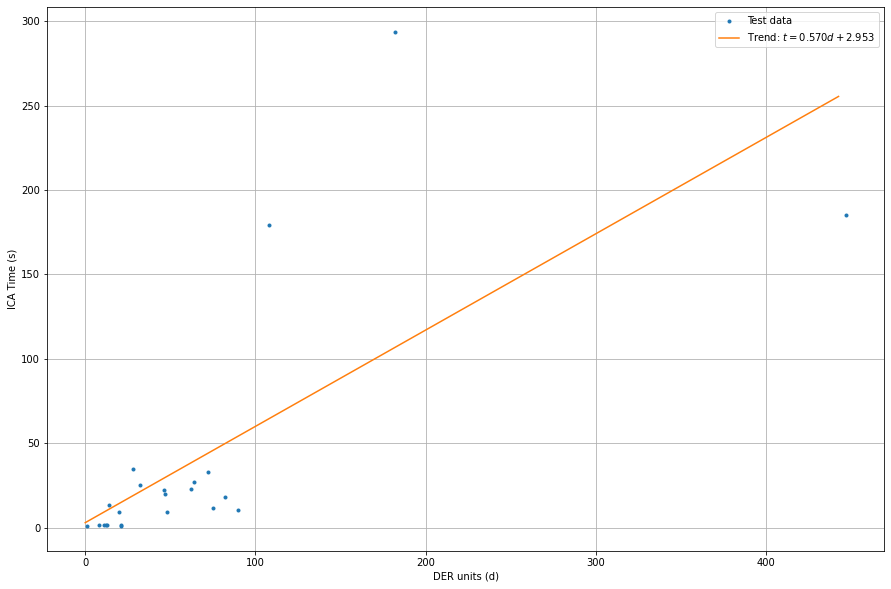

In [6]:
x = data['der_count']
y = data['icatest_time[s]']
def linear_curve(x,a,b): return a*x+b
fit,cov = opt.curve_fit(linear_curve,x,y)
xx = np.arange(0,max(x),max(x)/100)

plt.figure(figsize=(15,10))
plt.plot(x,y,'.',label="Test data")
plt.plot(xx,linear_curve(xx,*fit),label=f"Trend: $t = {fit[0]:.3f}d{fit[1]:+.3f}$")
plt.grid()
plt.xlabel("DER units (d)")
plt.ylabel("ICA Time (s)")
plt.legend();